In [1]:
from datetime import datetime

import matplotlib.pyplot as plt

from prediction.data import download_data, load_data, vessel_groups
from prediction.visualization import plot_north_america, plot_trajectories
from prediction.preprocessing import build_trajectories

In [2]:
download_data(datetime(2024, 1, 1))
groups = vessel_groups()
df = load_data(datetime(2024, 1, 1))
df["VesselType"] = df["VesselType"].apply(lambda x: x if x in groups.keys() else 21)

Data for 2024-01-01 already exists in /Users/marcus/Documents/Workspace/ship-trajectory-prediction/data/raw


100%|██████████| 1/1 [00:05<00:00,  5.69s/it]


In [3]:
trajectories = build_trajectories(df, min_points=10, vessel_groups=groups)
trajectories.head()

100%|██████████| 14868/14868 [02:24<00:00, 102.57it/s]


,MMSI,geometry,start_time,end_time,point_count,vessel_type
0,0,"LINESTRING (-76.18495 36.91335, -76.18494 36.9...",2024-01-01 00:01:59,2024-01-01 23:57:59,396.0,Other
2,3381234,"LINESTRING (-76.70942 34.71526, -76.70934 34.7...",2024-01-01 00:01:03,2024-01-01 23:58:10,349.0,Other
3,3660489,"LINESTRING (-89.9242 27.37022, -89.9242 27.370...",2024-01-01 00:01:47,2024-01-01 21:01:46,30.0,Other
7,36926403,"LINESTRING (-81.41262 30.3923, -81.4126 30.392...",2024-01-01 00:00:18,2024-01-01 23:57:17,438.0,Other
8,36968098,"LINESTRING (-76.32952 36.9512, -76.32949 36.95...",2024-01-01 00:00:07,2024-01-01 23:58:58,1245.0,Unknown


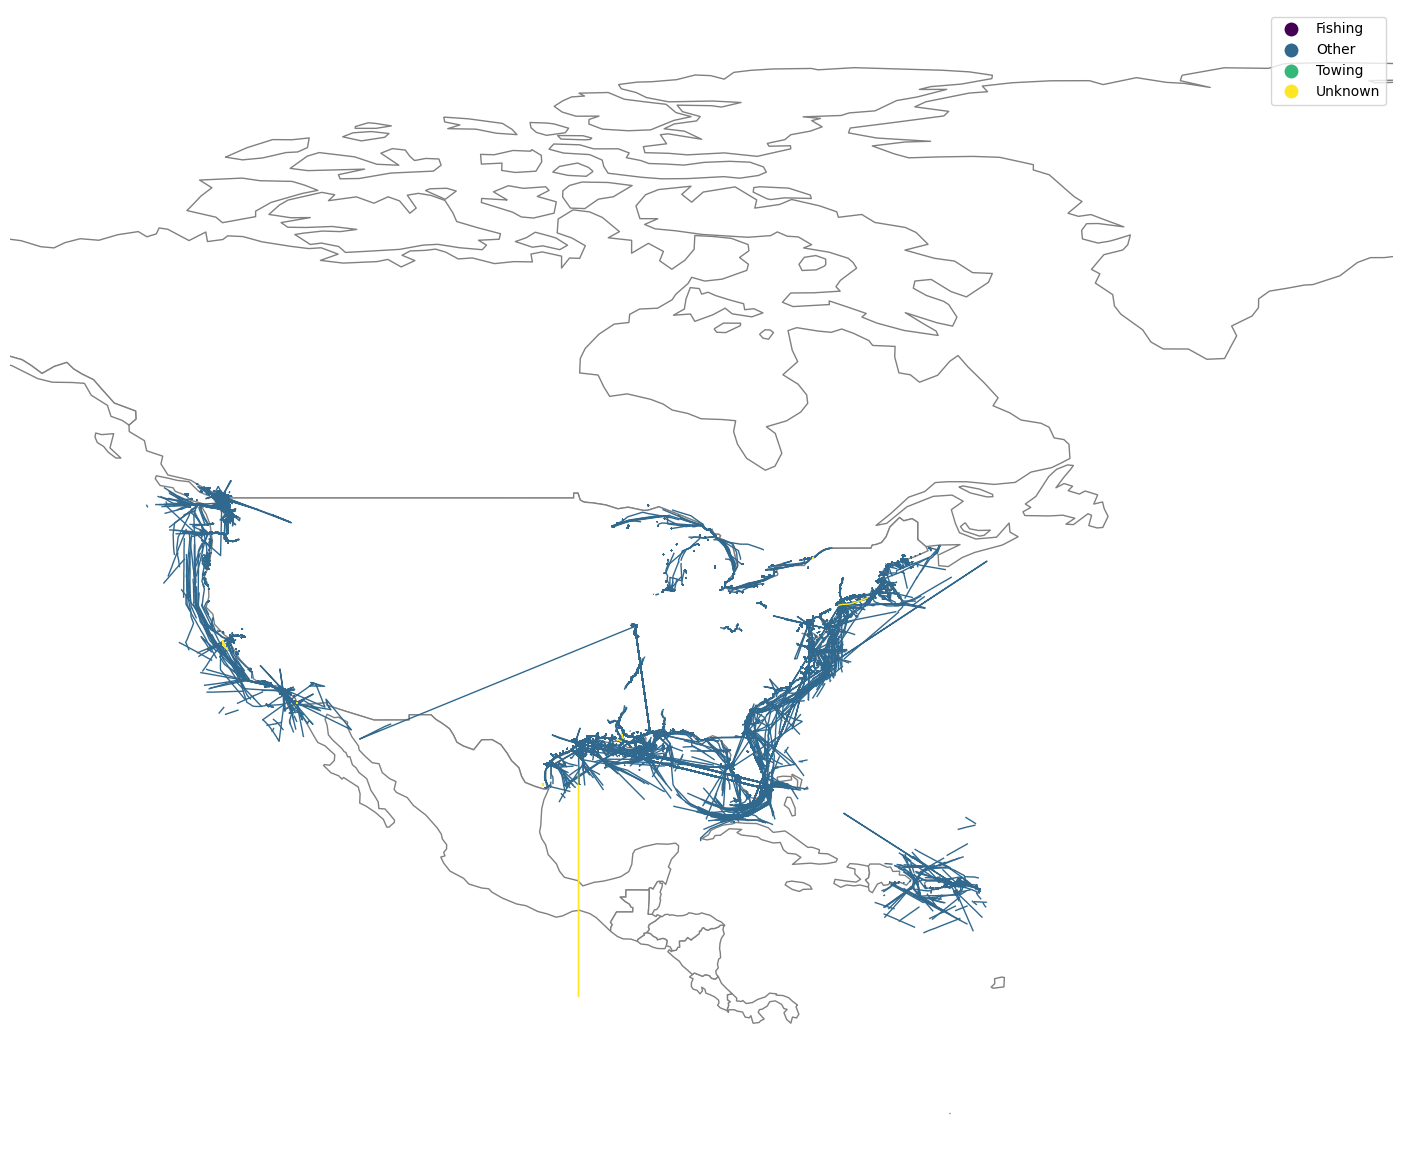

In [4]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_axis_off()
plot_north_america(ax)
plot_trajectories(trajectories, ax)

# cut axes to north america
ax.set_xlim(-140, -30)

plt.show()